<a href="https://colab.research.google.com/github/Remi12138/Xianjing_Huang_Mini_Proj_9/blob/main/mini9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Import

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import warnings
import matplotlib.dates as mdates
from io import StringIO
from urllib3.exceptions import InsecureRequestWarning 
warnings.simplefilter('ignore', InsecureRequestWarning)
file_path = (
        "https://raw.githubusercontent.com/nogibjj/Xianjing_Huang_Individual_Project_1/refs/heads/main/MSFT-stock.csv"
)

In [85]:
def read_data(file):
    """Read Dataset by Pandas"""
    return pd.read_csv(file)

def generate_summary_statistics(df):
    """Return Summary Stats"""
    #     cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
    return df.describe()

def compute_summary_statistics(df):
    """compute mean, median, standard deviation"""
    col_len = df.shape[1]

    for i in range(1, col_len):
        name = df.columns[i]
        mean = df[name].mean()
        print(f"Mean of {name}: {mean:.2f}")
    print("-------------")
    for i in range(1, col_len):
        name = df.columns[i]
        median = df[name].median()
        print(f"Median of {name}: {median:.2f}")
    print("-------------")
    for i in range(1, col_len):
        name = df.columns[i]
        std = df[name].std()
        print(f"Standard Deviation of {name}: {std:.2f}")
    print("-------------")
    return

def draw_line_chart(df):
    """Show the Open and Close prices over time"""
    df["Date"] = pd.to_datetime(df["Date"])
    plt.figure(figsize=(10, 6))
    plt.plot(df["Date"], df["Open"], label="Open", marker="o")
    plt.plot(df["Date"], df["Close"], label="Close", marker="o")
    plt.title("Open and Close Prices Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=10)
    plt.savefig("stock_line_chart.png")
    plt.show()

# Data Lodading and Summary Generated

In [86]:
response = requests.get(file_path, verify=False)
data = StringIO(response.text)

df = read_data(data)
assert df is not None
assert df.shape == (20, 7)

In [87]:
print(generate_summary_statistics(df))

             Open        High         Low       Close   Adj Close  \
count   20.000000   20.000000   20.000000   20.000000   20.000000   
mean   178.607500  180.567000  176.232999  178.801500  178.412678   
std      8.676754    8.279787    8.306955    8.003239    8.006061   
min    161.149994  163.380005  160.199997  162.279999  161.837952   
25%    171.765003  174.387501  170.194996  172.307499  171.954518   
50%    182.965004  184.010002  179.235001  181.875000  181.379586   
75%    184.417500  186.484997  182.704994  184.507503  184.260147   
max    190.649994  190.699997  186.470001  188.699997  188.185989   

             Volume  
count  2.000000e+01  
mean   3.762850e+07  
std    1.109255e+07  
min    2.314950e+07  
25%    3.011120e+07  
50%    3.557005e+07  
75%    4.115545e+07  
max    6.831110e+07  


In [88]:
compute_summary_statistics(df)

Mean of Open: 178.61
Mean of High: 180.57
Mean of Low: 176.23
Mean of Close: 178.80
Mean of Adj Close: 178.41
Mean of Volume: 37628505.00
-------------
Median of Open: 182.97
Median of High: 184.01
Median of Low: 179.24
Median of Close: 181.88
Median of Adj Close: 181.38
Median of Volume: 35570050.00
-------------
Standard Deviation of Open: 8.68
Standard Deviation of High: 8.28
Standard Deviation of Low: 8.31
Standard Deviation of Close: 8.00
Standard Deviation of Adj Close: 8.01
Standard Deviation of Volume: 11092551.35
-------------


# Visualization

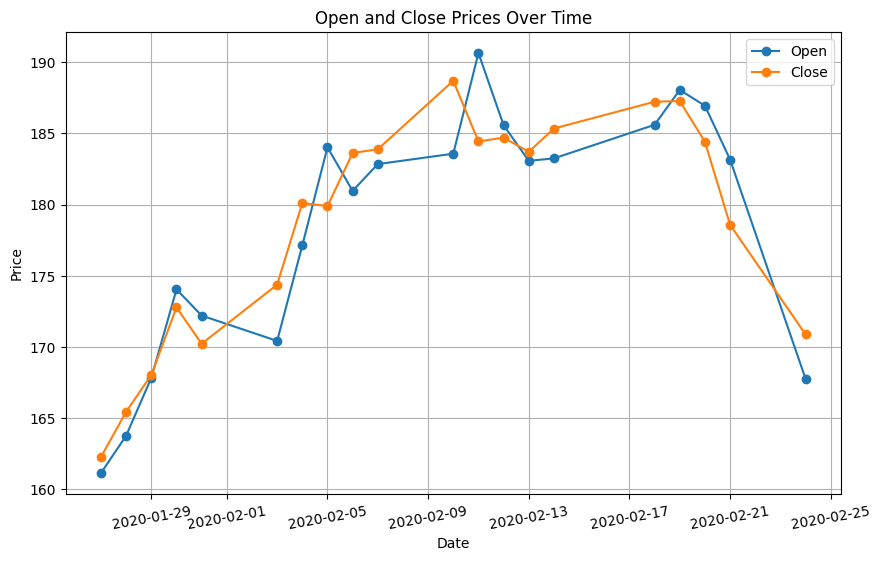

In [89]:
draw_line_chart(df)

# Data Preprocessing (Data Manipulation)

In [90]:
# Create a new column: Daily percentage change
df['Pct_Change'] = df['Close'].pct_change() * 100

# Create a new column: 5-day rolling average for volume
df['5-day Volume Avg'] = df['Volume'].rolling(window=5).mean()

# New Statistics

In [91]:
# Display the first few rows of the transformed dataset
print(df.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2020-01-27  161.149994  163.380005  160.199997  162.279999  161.837952   
1 2020-01-28  163.779999  165.759995  163.070007  165.460007  165.009308   
2 2020-01-29  167.839996  168.750000  165.690002  168.039993  167.582260   
3 2020-01-30  174.050003  174.050003  170.789993  172.779999  172.309357   
4 2020-01-31  172.210007  172.399994  169.580002  170.229996  169.766296   

     Volume  Pct_Change  5-day Volume Avg  
0  32078100         NaN               NaN  
1  24899900    1.959581               NaN  
2  34754500    1.559281               NaN  
3  51597500    2.820761               NaN  
4  36142700   -1.475867        35894540.0  


In [92]:
print(df.select_dtypes(include=['float', 'int']).describe())

             Open        High         Low       Close   Adj Close  \
count   20.000000   20.000000   20.000000   20.000000   20.000000   
mean   178.607500  180.567000  176.232999  178.801500  178.412678   
std      8.676754    8.279787    8.306955    8.003239    8.006061   
min    161.149994  163.380005  160.199997  162.279999  161.837952   
25%    171.765003  174.387501  170.194996  172.307499  171.954518   
50%    182.965004  184.010002  179.235001  181.875000  181.379586   
75%    184.417500  186.484997  182.704994  184.507503  184.260147   
max    190.649994  190.699997  186.470001  188.699997  188.185989   

             Volume  Pct_Change  5-day Volume Avg  
count  2.000000e+01   19.000000      1.600000e+01  
mean   3.762850e+07    0.293844      3.645059e+07  
std    1.109255e+07    2.119648      3.250716e+06  
min    2.314950e+07   -4.311550      3.061948e+07  
25%    3.011120e+07   -1.008628      3.380188e+07  
50%    3.557005e+07    0.146392      3.659330e+07  
75%    4.11554

# New Visualization

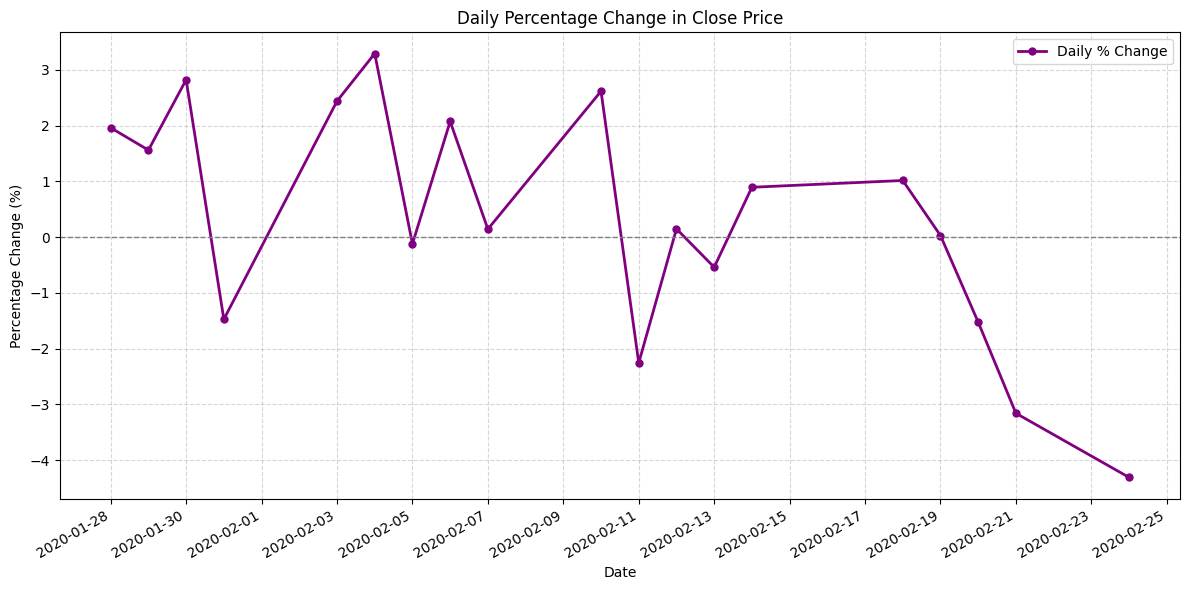

In [93]:
# Ensure Date is datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))

# Plot Daily Percentage Change
plt.plot(df.index, df['Pct_Change'], label='Daily % Change', 
         color='purple', linewidth=2, marker='o', markersize=5)

# Adding a horizontal line at y=0 for reference
plt.axhline(0, color='grey', linestyle='--', linewidth=1)

# Set date format on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))

# Auto-format x-axis dates
plt.gcf().autofmt_xdate()

# Customizing plot
plt.title('Daily Percentage Change in Close Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


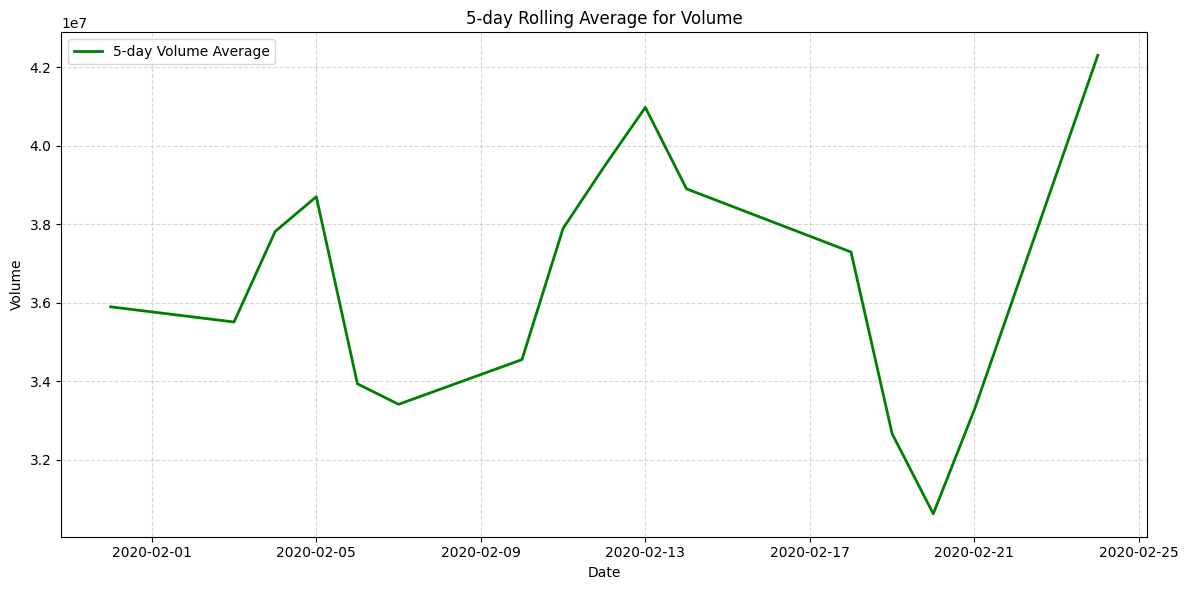

In [94]:
# Plotting the 5-day rolling average for volume
df_filtered = df.dropna(subset=['5-day Volume Avg'])

plt.figure(figsize=(12, 6))

# Plot 5-day Rolling Average for Volume
plt.plot(df.index, df['5-day Volume Avg'], label='5-day Volume Average', 
         color='green', linewidth=2)

# Customizing plot
plt.title('5-day Rolling Average for Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
